In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("Rainfall Prediction(Gaurav_Birari).csv")

In [3]:
# Top 5 records
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Last 5 records
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [5]:
print("Dataset have \nRows-",df.shape[0],'\nColumns -',df.shape[1])

Dataset have 
Rows- 8425 
Columns - 23


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,8350.0,13.193305,5.403596,-2.0,9.20,13.3,17.4,28.5
MaxTemp,8365.0,23.859976,6.136408,8.2,19.30,23.3,28.0,45.5
Rainfall,8185.0,2.805913,10.459379,0.0,0.00,0.0,1.0,371.0
Evaporation,4913.0,5.389395,5.044484,0.0,2.60,4.6,7.0,145.0
Sunshine,4431.0,7.632205,3.896235,0.0,4.75,8.7,10.7,13.9
WindGustSpeed,7434.0,40.174469,14.665721,7.0,30.00,39.0,50.0,107.0
WindSpeed9am,8349.0,13.847646,10.174579,0.0,6.00,13.0,20.0,63.0
WindSpeed3pm,8318.0,18.533662,9.766986,0.0,11.00,19.0,24.0,83.0
Humidity9am,8366.0,67.822496,16.833283,10.0,56.00,68.0,80.0,100.0
Humidity3pm,8323.0,51.249790,18.423774,6.0,39.00,51.0,63.0,99.0


## Missing Values

In [9]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [10]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

Sunshine         47.41
Evaporation      41.69
Cloud3pm         29.14
Cloud9am         28.74
Pressure3pm      15.57
Pressure9am      15.54
WindGustDir      11.76
WindGustSpeed    11.76
WindDir9am        9.84
WindDir3pm        3.66
RainToday         2.85
Rainfall          2.85
RainTomorrow      2.84
WindSpeed3pm      1.27
Humidity3pm       1.21
Temp3pm           1.14
WindSpeed9am      0.90
MinTemp           0.89
MaxTemp           0.71
Humidity9am       0.70
Temp9am           0.66
Location          0.00
Date              0.00
dtype: float64

<Axes: >

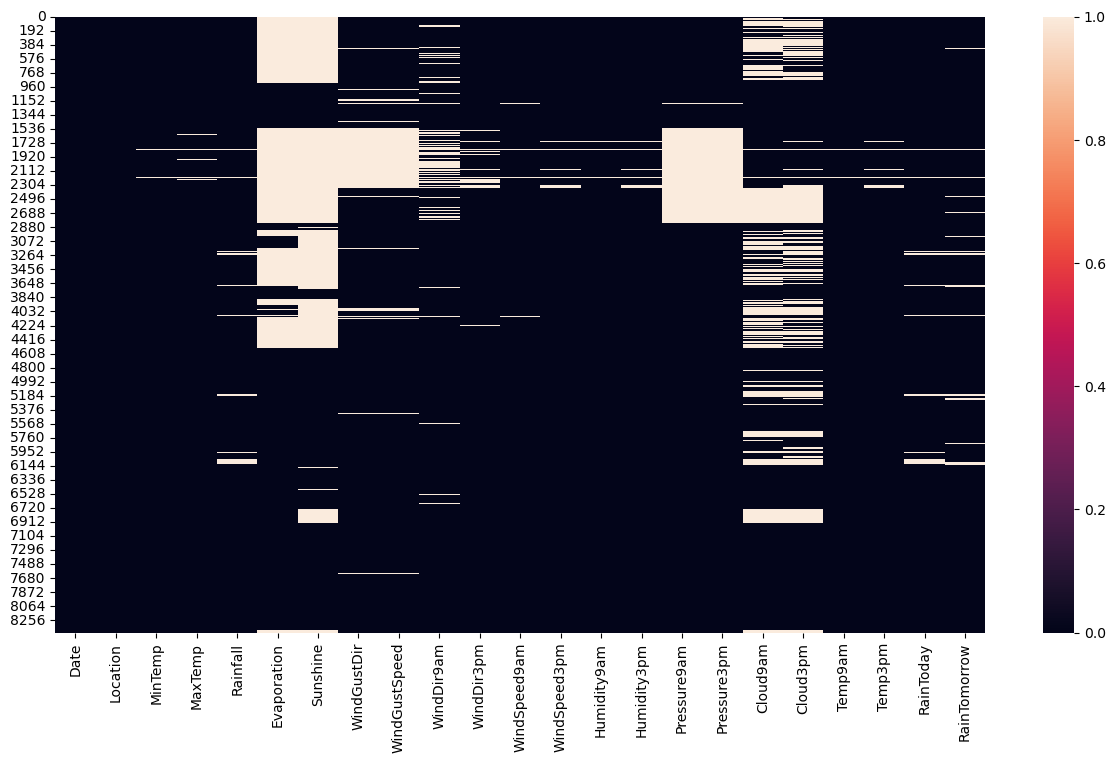

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())

Alot of missing values are present in the dataset

In [13]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [14]:
catg_features=[col for col in df.columns if df[col].dtypes=='object']
cont_features=[col for col in df.columns if df[col].dtypes!='object']

In [15]:
catg_features

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [16]:
len(cont_features)

16

([<matplotlib.patches.Wedge at 0x1dfe3bb44d0>,
 [Text(0.6343483909086429, 0.8986668564888858, 'Categorical'),
  Text(-0.6343483909086428, -0.8986668564888859, 'Continuous')],
 [Text(0.3460082132228961, 0.4901819217212104, '30.4%'),
  Text(-0.34600821322289604, -0.49018192172121045, '69.6%')])

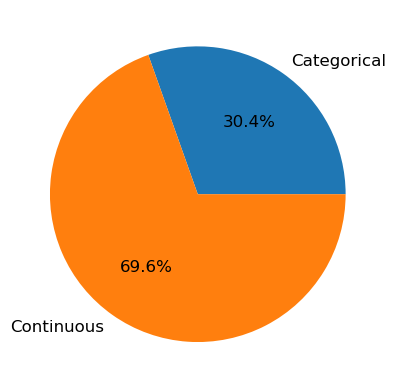

In [17]:
plt.pie([len(catg_features),len(cont_features)],labels=['Categorical','Continuous'],textprops={'fontsize':12},autopct='%1.1f%%')

## Target Feature

In [19]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [20]:
df['RainTomorrow'].value_counts(normalize=True,dropna=False)*100

RainTomorrow
No     73.531157
Yes    23.632047
NaN     2.836795
Name: proportion, dtype: float64

In [21]:
target_df=df['RainTomorrow'].value_counts(normalize=True,dropna=False)*100

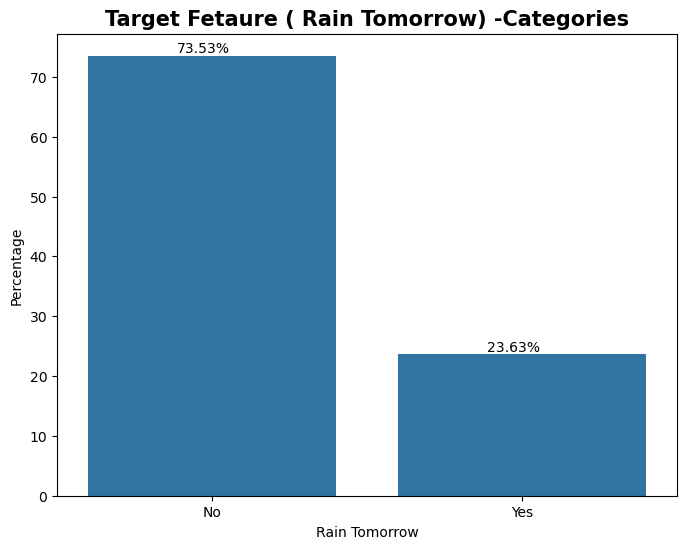

In [22]:
plt.figure(figsize=(8,6))
plt.title("Target Fetaure ( Rain Tomorrow) -Categories",fontweight='bold',fontsize=15)
ax=sns.barplot(x=target_df.index,y=target_df.values)
plt.xlabel('Rain Tomorrow')
plt.ylabel('Percentage')



for p in ax.patches:
    height=p.get_height()
    width=p.get_width()
    x,_=p.get_xy()
    ax.text(x +width/2.8,height+.5,f'{height:.2f}%')


## Date

In [24]:
df['Date'].nunique()

3004

## Location

In [26]:
df['Location'].unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

In [27]:
df['Location'].value_counts()

Location
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: count, dtype: int64

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200'),
  Text(1400.0, 0, '1400'),
  Text(1600.0, 0, '1600'),
  Text(1800.0, 0, '1800')])

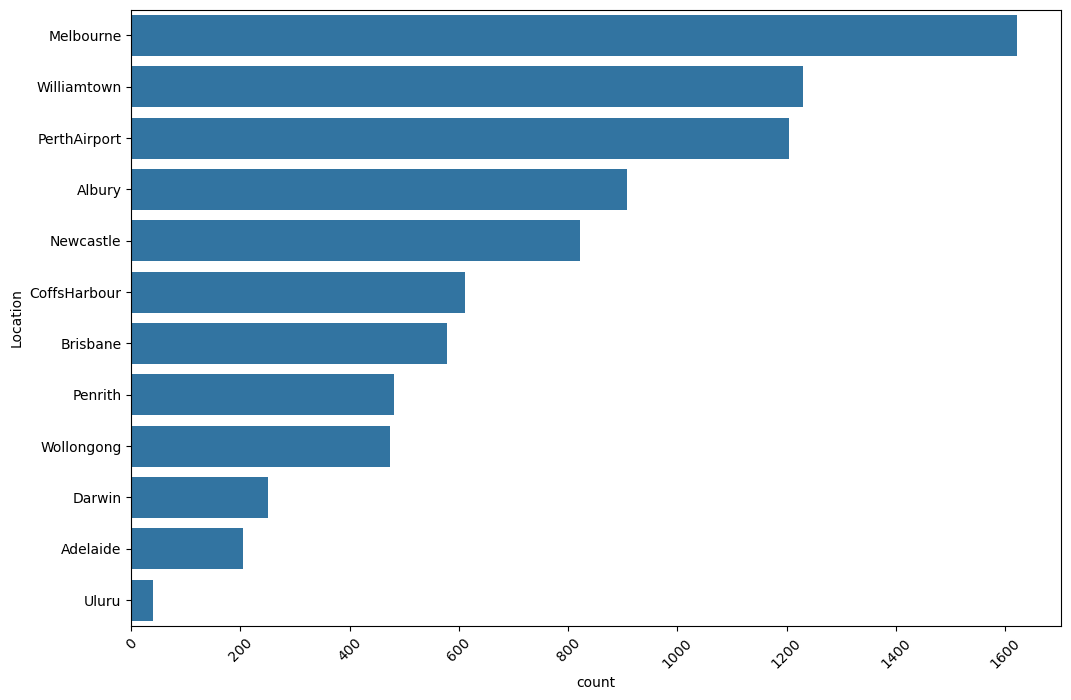

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(df['Location'],order=df['Location'].value_counts().index)
plt.xticks(rotation=45)

## MinTemp

<Axes: xlabel='MinTemp', ylabel='Density'>

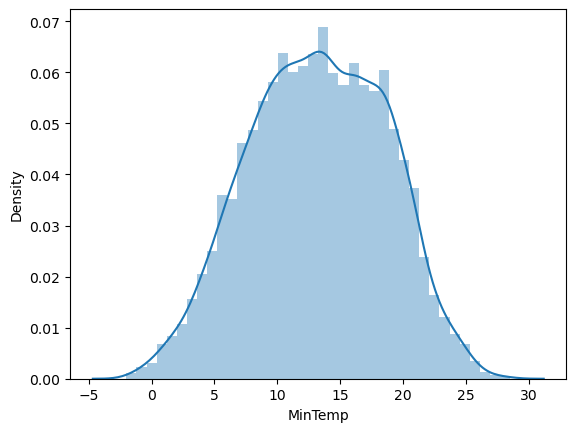

In [30]:
sns.distplot(df['MinTemp'])

In [31]:
# Data distribution looke like normally distributed

## MaxTemp

<Axes: xlabel='MaxTemp', ylabel='Density'>

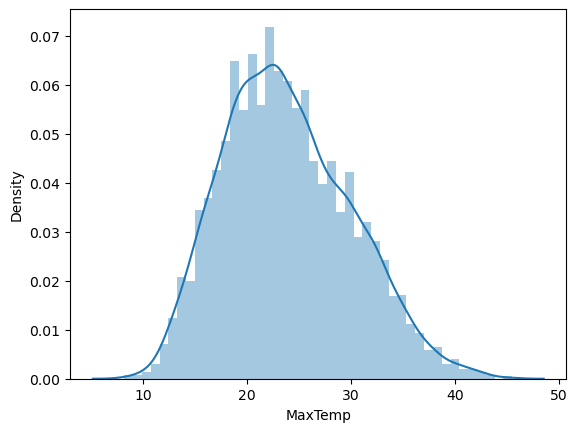

In [33]:
sns.distplot(df['MaxTemp'])

## Distribution of Continuous features

In [35]:
import random

color_=['#000057','#005757','#005700','#ad7100','#008080','#575757','#003153']
cmap_=['magma','copper','crest']

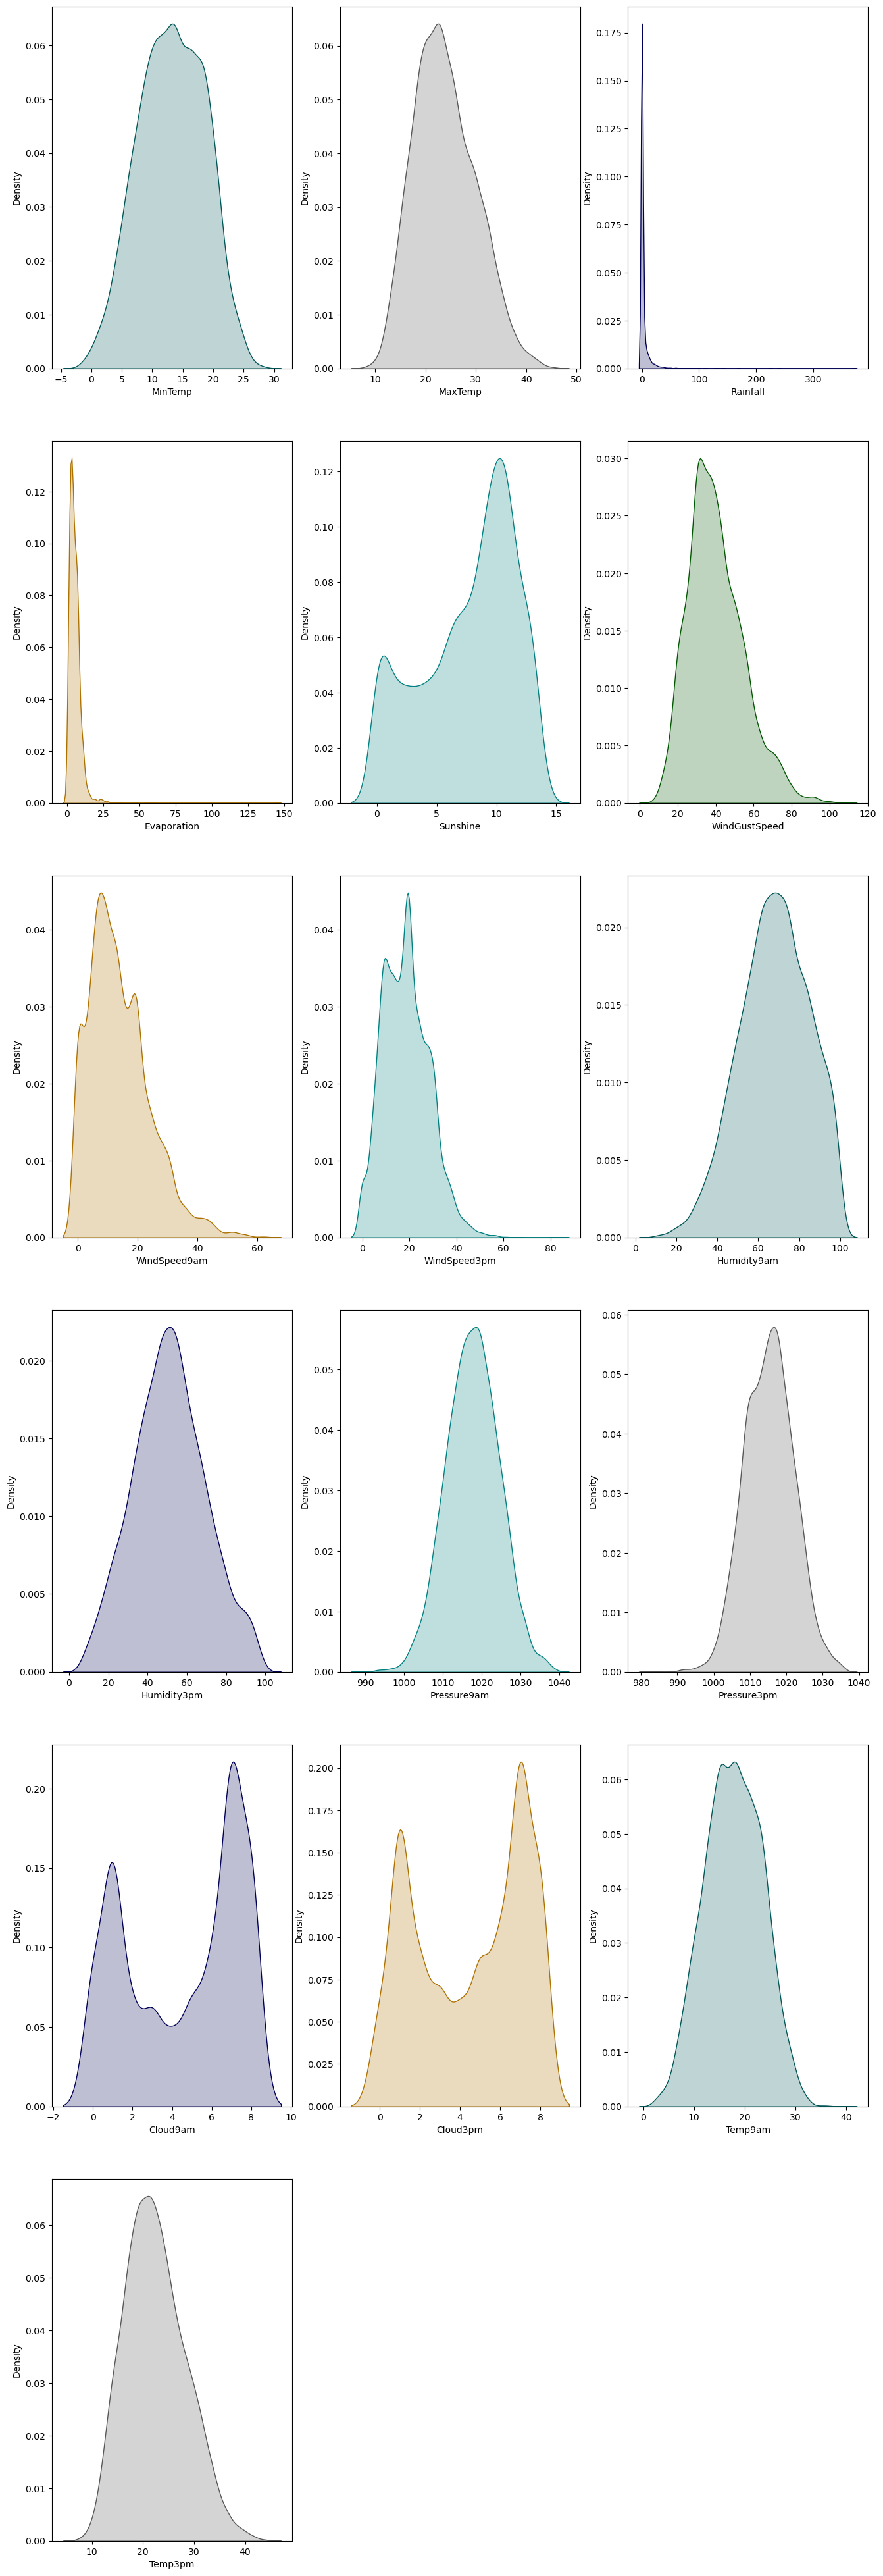

In [36]:
plt.figure(figsize=(16,50))
for i,col in enumerate(df[cont_features].columns):
    rand_col=color_[random.sample(range(6),1)[0]]
    plt.subplot(6,3,i+1)
    
    sns.kdeplot(data=df,x=col,color=rand_col,fill=rand_col,palette=cmap_[random.sample(range(3),1)[0]])

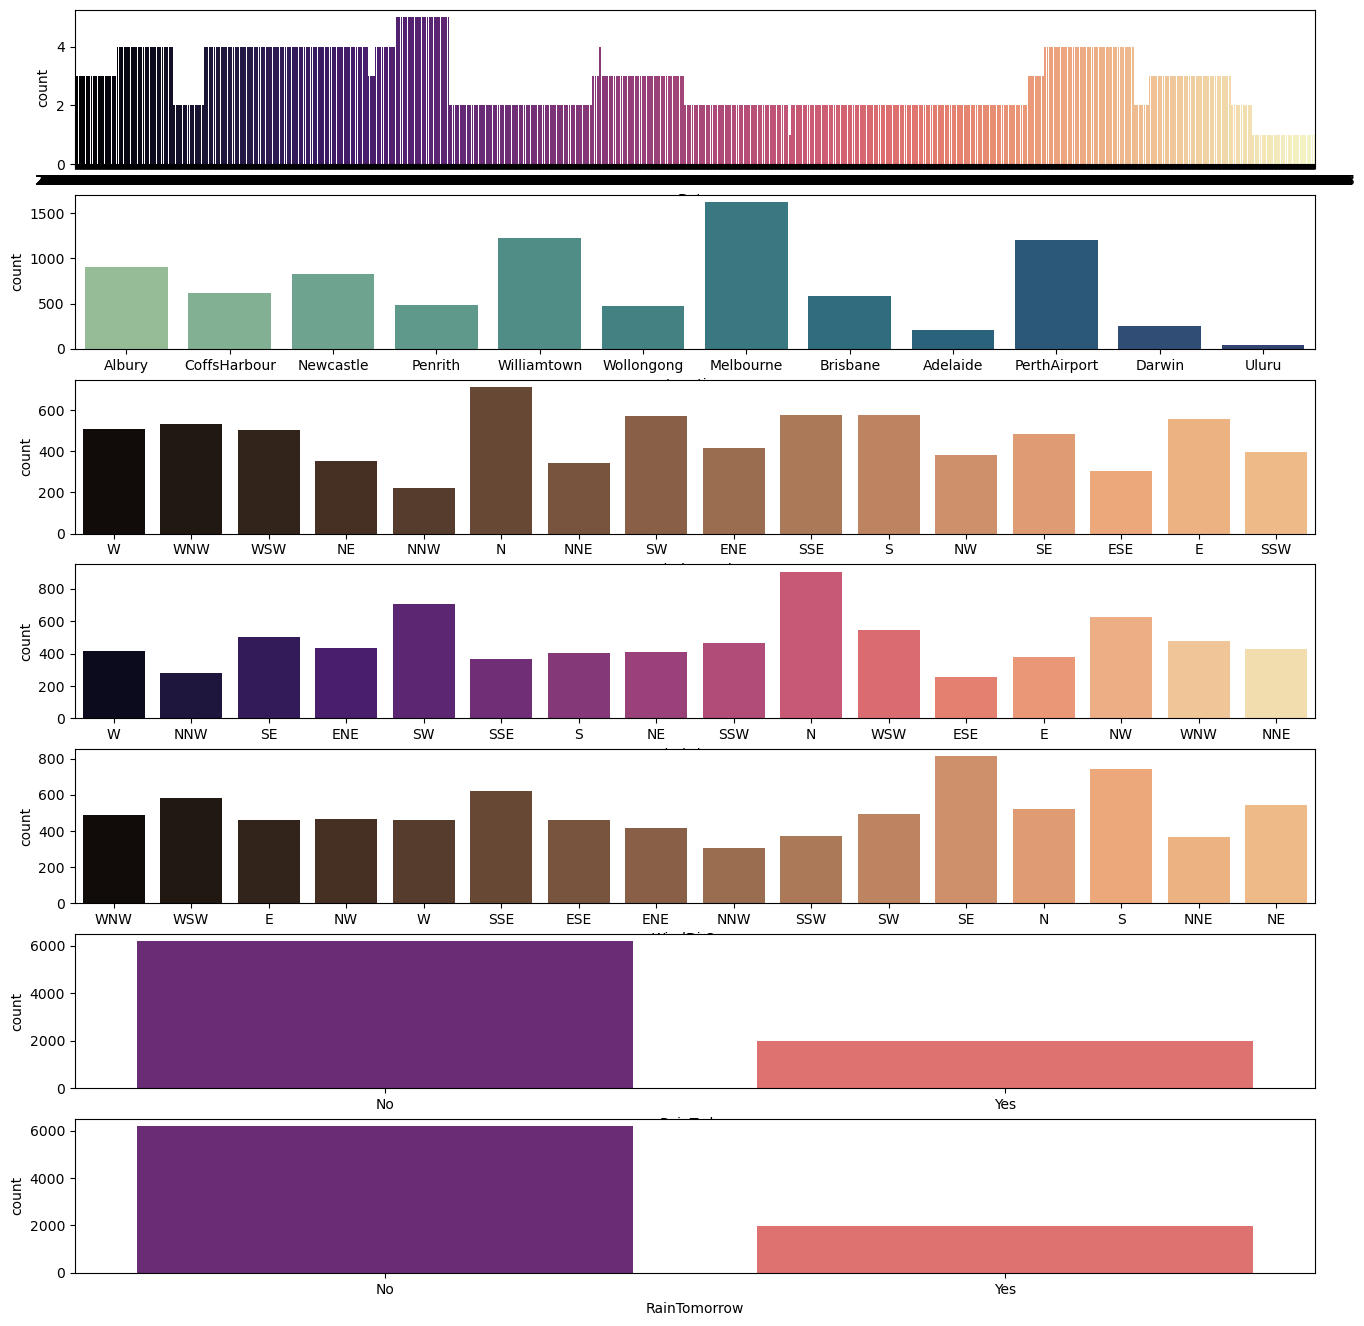

In [37]:
plt.figure(figsize=(16,50))
for i,col in enumerate(df[catg_features].columns):
    rand_col=color_[random.sample(range(6),1)[0]]
    plt.subplot(21,1,i+1)
    
    sns.countplot(data=df,x=col,color=rand_col,fill=rand_col,palette=cmap_[random.sample(range(3),1)[0]])

# Bivarient EDA

In [39]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [40]:
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Melbourne'),
  Text(1, 0, 'Williamtown'),
  Text(2, 0, 'PerthAirport'),
  Text(3, 0, 'Albury'),
  Text(4, 0, 'Newcastle'),
  Text(5, 0, 'CoffsHarbour'),
  Text(6, 0, 'Brisbane'),
  Text(7, 0, 'Penrith'),
  Text(8, 0, 'Wollongong'),
  Text(9, 0, 'Darwin'),
  Text(10, 0, 'Adelaide'),
  Text(11, 0, 'Uluru')])

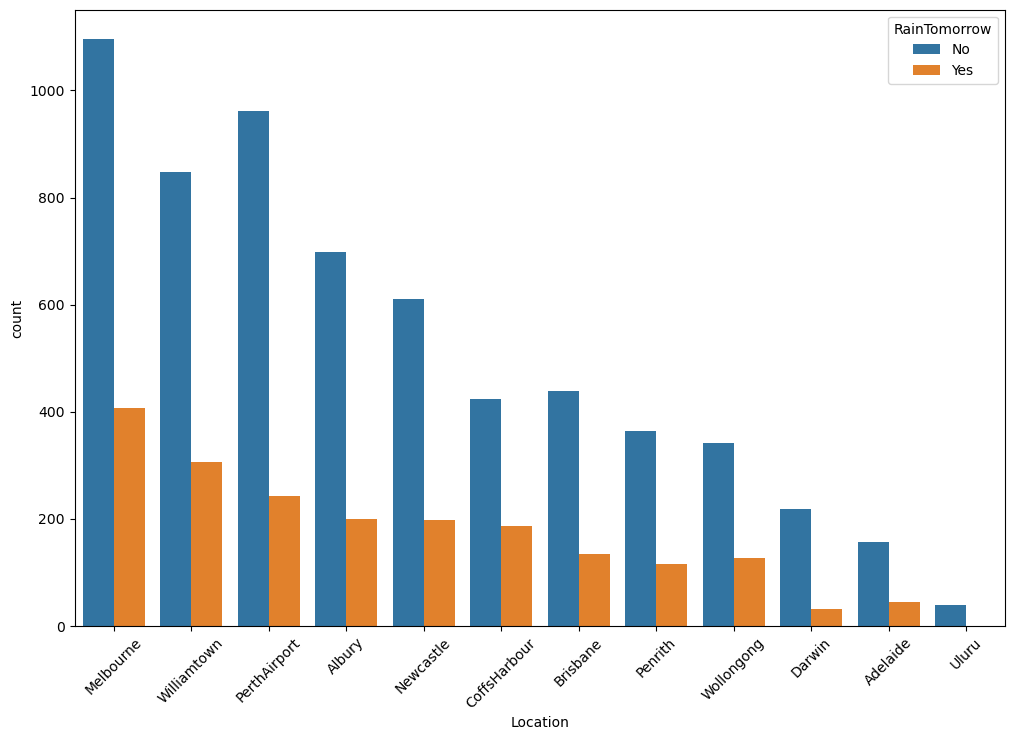

In [41]:
plt.figure(figsize=(12,8))
sns.countplot(df,x='Location',order=df['Location'].value_counts().index,hue=df['RainTomorrow'])
plt.xticks(rotation=45)

<Axes: xlabel='Location'>

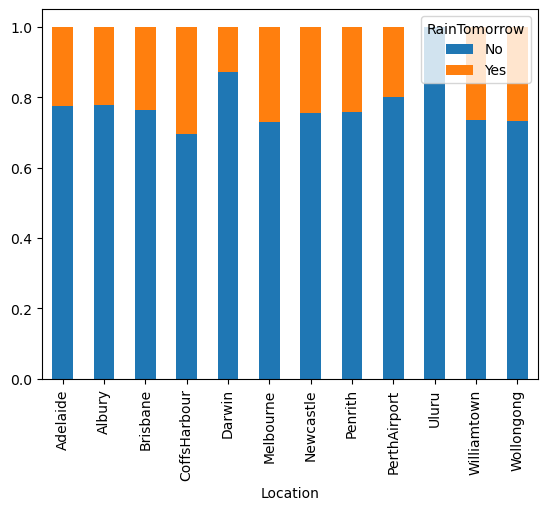

In [42]:
table=pd.crosstab(df['Location'],df['RainTomorrow'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)

# MinTemp', 'MaxTemp

<Axes: xlabel='MinTemp', ylabel='MaxTemp'>

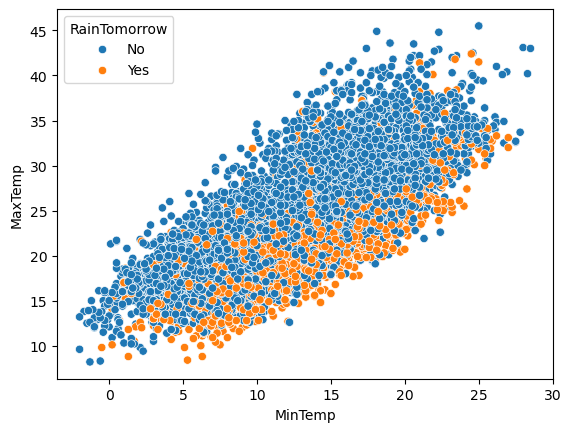

In [44]:
sns.scatterplot(x='MinTemp',y='MaxTemp',hue='RainTomorrow',data=df)

# 'Evaporation',
       'Sunshine'

<Axes: xlabel='Sunshine', ylabel='Evaporation'>

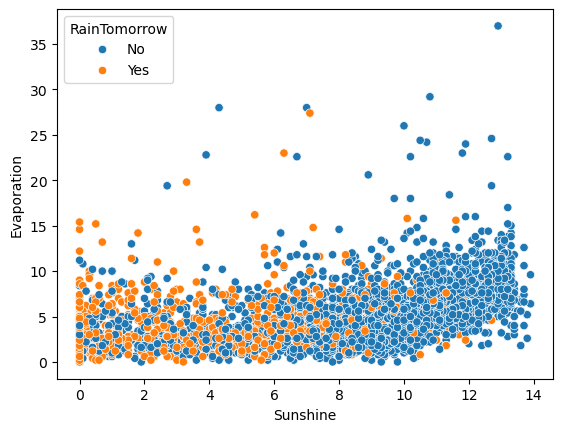

In [46]:
sns.scatterplot(x='Sunshine',y='Evaporation',hue='RainTomorrow',data=df)

# WindGustDir', 'WindGustSpeed

<Axes: xlabel='WindGustSpeed', ylabel='WindGustDir'>

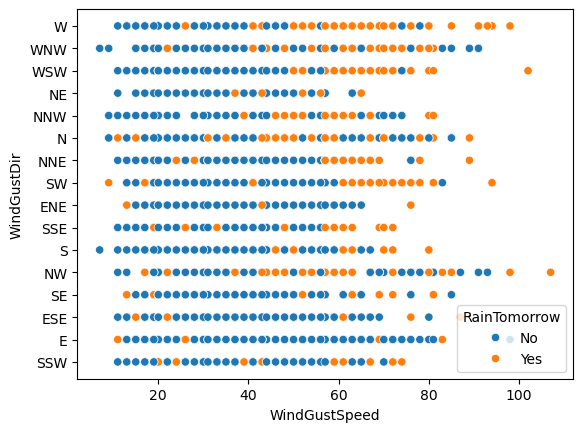

In [48]:
sns.scatterplot(x='WindGustSpeed',y='WindGustDir',hue='RainTomorrow',data=df)

# WindDir9am  WindSpeed9am

<Axes: xlabel='WindSpeed9am', ylabel='WindDir9am'>

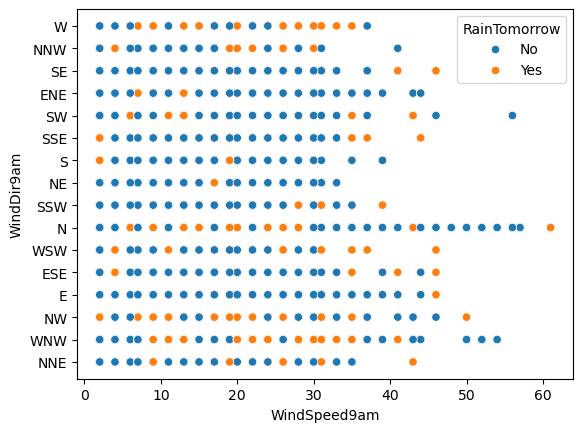

In [50]:
sns.scatterplot(x='WindSpeed9am',y='WindDir9am',hue='RainTomorrow',data=df)

# WindDir3pm WindSpeed3pm

<Axes: xlabel='WindSpeed3pm', ylabel='WindDir3pm'>

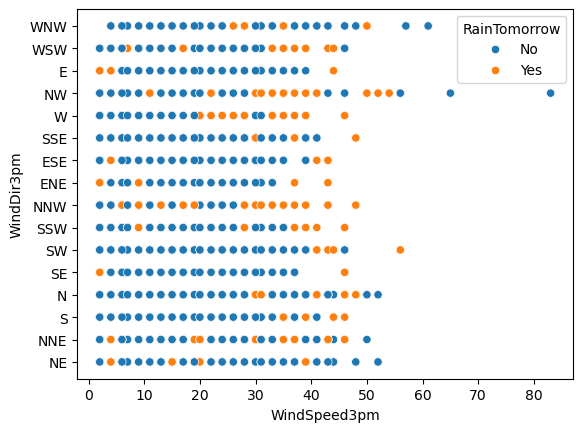

In [52]:
sns.scatterplot(x='WindSpeed3pm',y='WindDir3pm',hue='RainTomorrow',data=df)

In [53]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# 'Humidity9am', 'Humidity3pm'

<Axes: xlabel='Humidity3pm', ylabel='Humidity9am'>

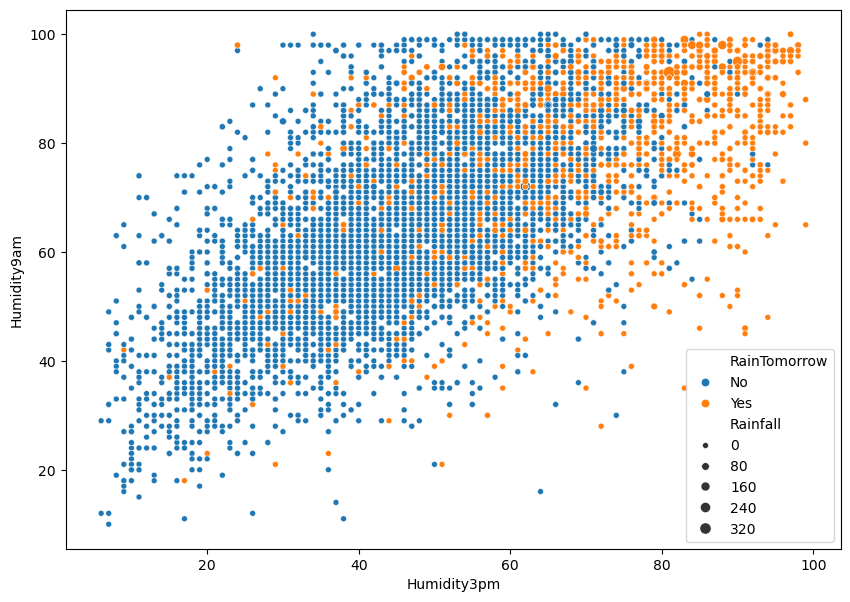

In [55]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Humidity3pm',y='Humidity9am',hue='RainTomorrow',size='Rainfall',data=df)

# Pressure9am', 'Pressure3pm

<Axes: xlabel='Pressure3pm', ylabel='Pressure9am'>

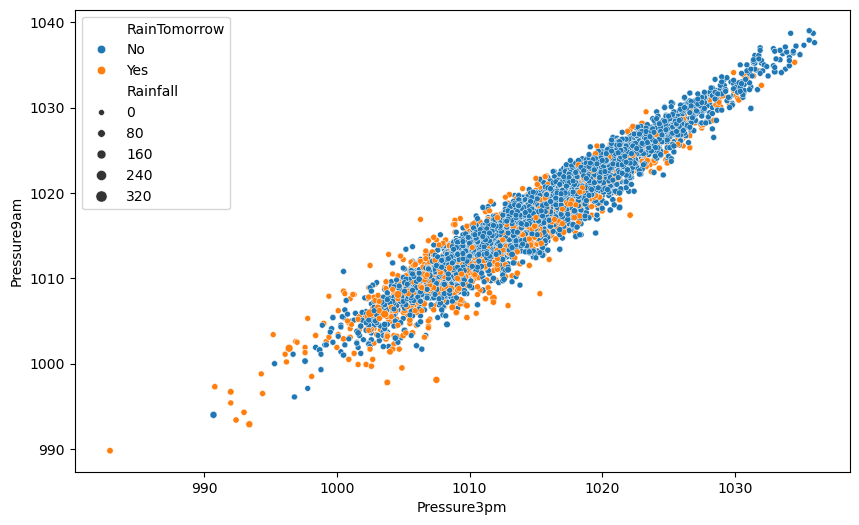

In [57]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Pressure3pm',y='Pressure9am',hue='RainTomorrow',size='Rainfall',data=df)

# 'Cloud9am', 'Cloud3pm'

<Axes: xlabel='Cloud3pm', ylabel='Cloud9am'>

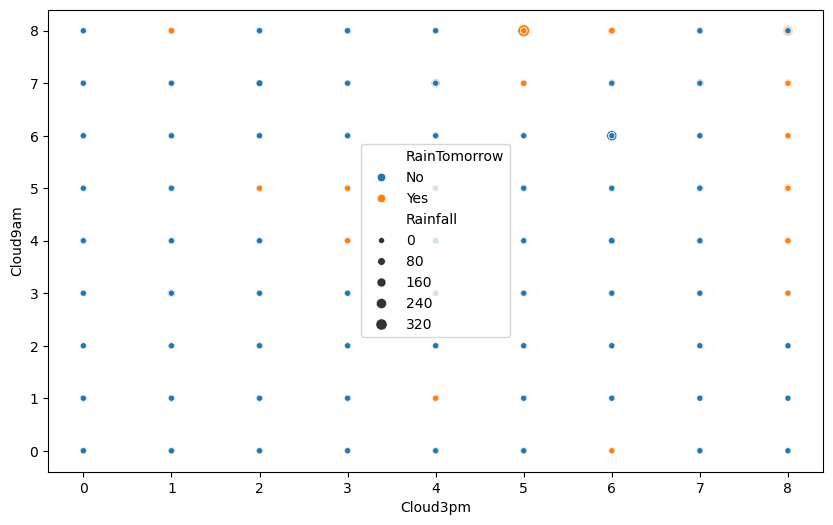

In [59]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Cloud3pm',y='Cloud9am',hue='RainTomorrow',size='Rainfall',data=df)


# Temp9am','Temp3pm

<Axes: xlabel='Temp3pm', ylabel='Temp9am'>

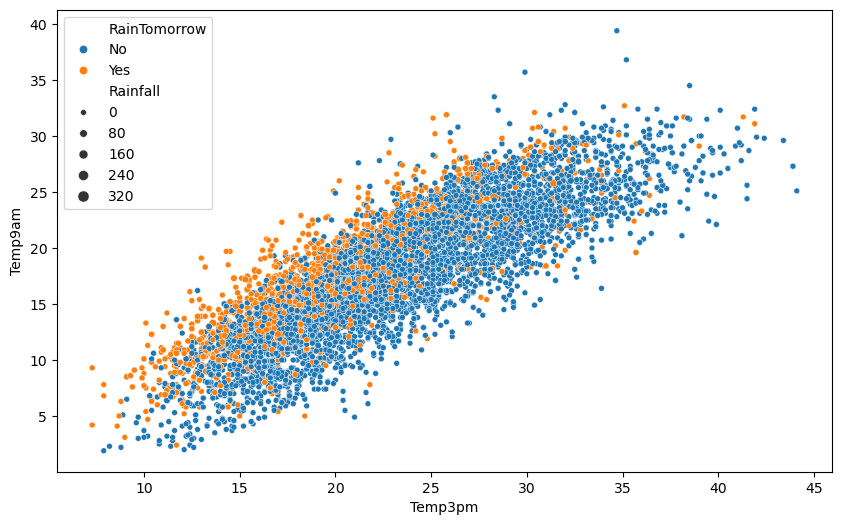

In [61]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Temp3pm',y='Temp9am',hue='RainTomorrow',size='Rainfall',data=df)


# RainToday', 'RainTomorrow'

In [63]:
df['RainToday'].value_counts()

RainToday
No     6195
Yes    1990
Name: count, dtype: int64

In [64]:
df.groupby('RainToday')['RainTomorrow'].value_counts()

RainToday  RainTomorrow
No         No              5142
           Yes              978
Yes        No              1013
           Yes              946
Name: count, dtype: int64

<Axes: xlabel='RainToday', ylabel='count'>

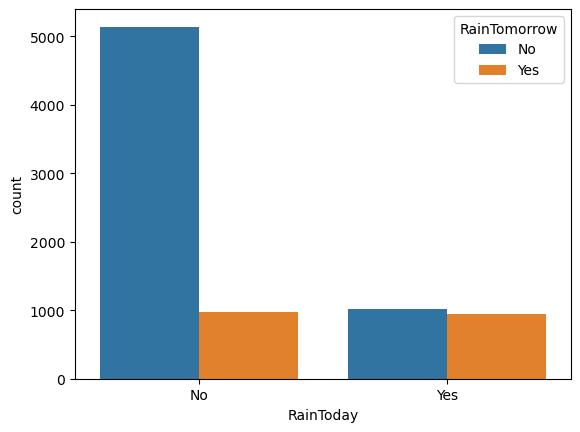

In [65]:
sns.countplot(data=df,x='RainToday',hue=df['RainTomorrow'])

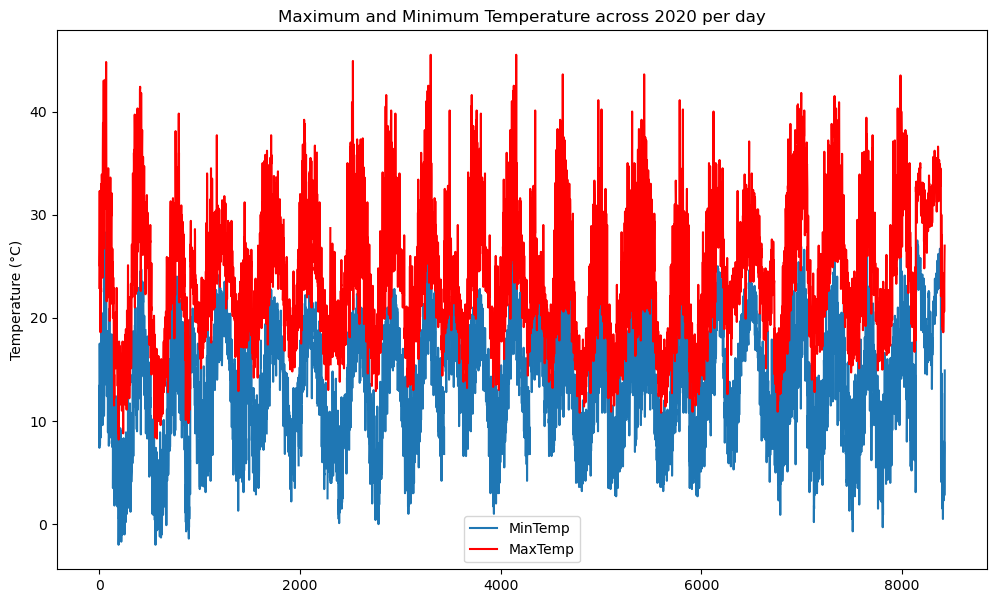

In [66]:
max_temp = df['MaxTemp']
min_temp = df['MinTemp']

min_temp.plot(figsize=(12,7), legend=True)
max_temp.plot(figsize=(12,7), color='r', legend=True)
plt.title('Maximum and Minimum Temperature across 2020 per day')
plt.ylabel('Temperature (°C)')
plt.show()

# Correlation

In [68]:
#df['RainTomorrow'].replace('No',0,inplace=True)
#df['RainTomorrow'].replace('Yes',1,inplace=True)

In [69]:
#df['RainToday'].replace('No',0,inplace=True)
#df['RainToday'].replace('Yes',1,inplace=True)

<Axes: >

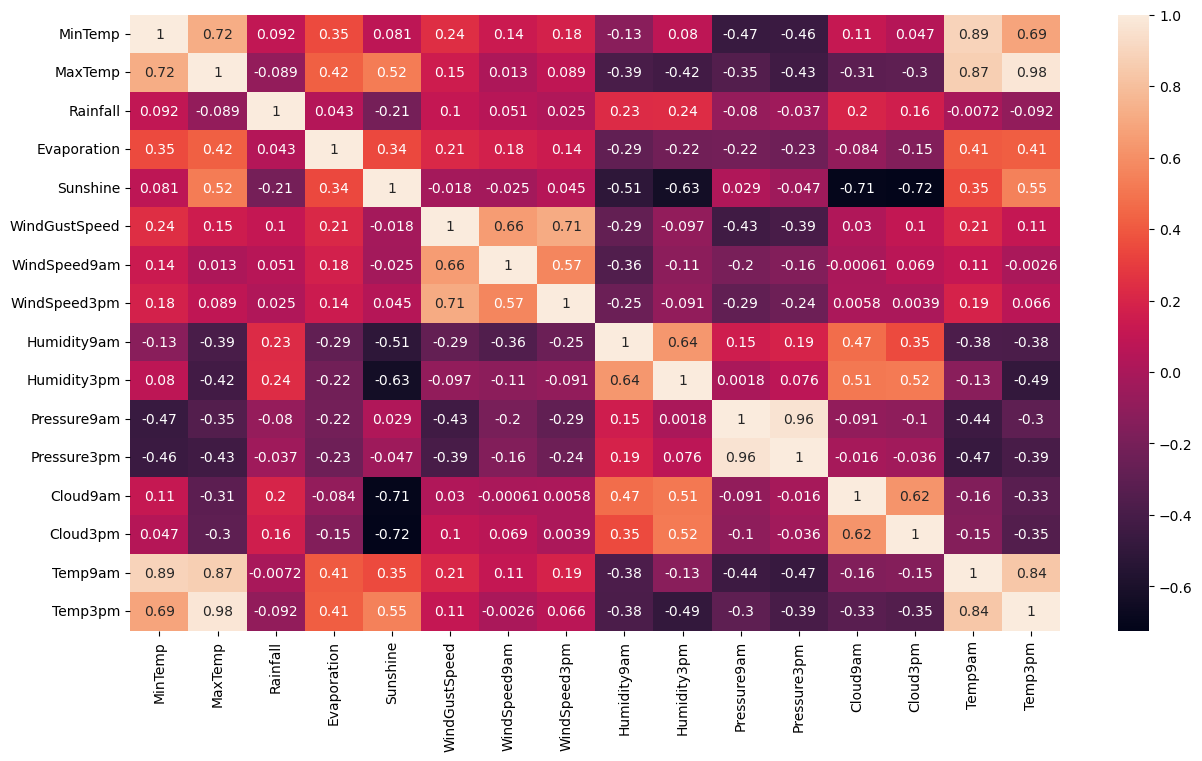

In [70]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(numeric_only=cont_features),annot=True)

# Create Model to predict if TrainTomorrow will happen or not

In [72]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

Sunshine         47.41
Evaporation      41.69
Cloud3pm         29.14
Cloud9am         28.74
Pressure3pm      15.57
Pressure9am      15.54
WindGustDir      11.76
WindGustSpeed    11.76
WindDir9am        9.84
WindDir3pm        3.66
RainToday         2.85
Rainfall          2.85
RainTomorrow      2.84
WindSpeed3pm      1.27
Humidity3pm       1.21
Temp3pm           1.14
WindSpeed9am      0.90
MinTemp           0.89
MaxTemp           0.71
Humidity9am       0.70
Temp9am           0.66
Location          0.00
Date              0.00
dtype: float64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [74]:
# seprate database on basis of RainTomorrow

yes_rain = df[df['RainTomorrow']=='Yes']
no_rain = df[df['RainTomorrow']=='No']

In [75]:
yes_rain.shape , no_rain.shape

((1991, 23), (6195, 23))

In [76]:
# For Temparatures replacing NaN with its respective mode value # Mode is most repeated values

In [77]:
yes_rain['MinTemp'].fillna(yes_rain['MinTemp'].mode()[0],inplace=True)
no_rain['MinTemp'].fillna(no_rain['MinTemp'].mode()[0],inplace=True)

yes_rain['MaxTemp'].fillna(yes_rain['MaxTemp'].mode()[0],inplace=True)
no_rain['MaxTemp'].fillna(no_rain['MaxTemp'].mode()[0],inplace=True)

yes_rain['Temp9am'].fillna(yes_rain['Temp9am'].mode()[0],inplace=True)
no_rain['Temp9am'].fillna(no_rain['Temp9am'].mode()[0],inplace=True)

yes_rain['Temp3pm'].fillna(yes_rain['Temp3pm'].mode()[0],inplace=True)
no_rain['Temp3pm'].fillna(no_rain['Temp3pm'].mode()[0],inplace=True)


yes_rain['Humidity3pm'].fillna(yes_rain['Humidity3pm'].mode()[0],inplace=True)
no_rain['Humidity3pm'].fillna(no_rain['Humidity3pm'].mode()[0],inplace=True)

yes_rain['Humidity9am'].fillna(yes_rain['Humidity9am'].mode()[0],inplace=True)
no_rain['Humidity9am'].fillna(no_rain['Humidity9am'].mode()[0],inplace=True)



In [78]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

Sunshine         47.41
Evaporation      41.69
Cloud3pm         29.14
Cloud9am         28.74
Pressure3pm      15.57
Pressure9am      15.54
WindGustDir      11.76
WindGustSpeed    11.76
WindDir9am        9.84
WindDir3pm        3.66
RainToday         2.85
Rainfall          2.85
RainTomorrow      2.84
WindSpeed3pm      1.27
Humidity3pm       1.21
Temp3pm           1.14
WindSpeed9am      0.90
MinTemp           0.89
MaxTemp           0.71
Humidity9am       0.70
Temp9am           0.66
Location          0.00
Date              0.00
dtype: float64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [80]:

yes_rain['Sunshine'].fillna(yes_rain['Sunshine'].median(),inplace=True)
no_rain['Sunshine'].fillna(no_rain['Sunshine'].median(),inplace=True)

yes_rain['Evaporation'].fillna(yes_rain['Evaporation'].median(),inplace=True)
no_rain['Evaporation'].fillna(no_rain['Evaporation'].median(),inplace=True)

yes_rain['Cloud3pm'].fillna(yes_rain['Cloud3pm'].median(),inplace=True)
no_rain['Cloud3pm'].fillna(no_rain['Cloud3pm'].median(),inplace=True)

yes_rain['Cloud9am'].fillna(yes_rain['Cloud9am'].median(),inplace=True)
no_rain['Cloud9am'].fillna(no_rain['Cloud9am'].median(),inplace=True)

yes_rain['Pressure3pm'].fillna(yes_rain['Pressure3pm'].median(),inplace=True)
no_rain['Pressure3pm'].fillna(no_rain['Pressure3pm'].median(),inplace=True)

yes_rain['Pressure9am'].fillna(yes_rain['Pressure9am'].median(),inplace=True)
no_rain['Pressure9am'].fillna(no_rain['Pressure9am'].median(),inplace=True)

yes_rain['WindGustDir'].fillna(yes_rain['WindGustDir'].mode()[0],inplace=True)
no_rain['WindGustDir'].fillna(no_rain['WindGustDir'].mode()[0],inplace=True)

yes_rain['WindGustSpeed'].fillna(yes_rain['WindGustSpeed'].median(),inplace=True)
no_rain['WindGustSpeed'].fillna(no_rain['WindGustSpeed'].median(),inplace=True)

yes_rain['WindDir9am'].fillna(yes_rain['WindDir9am'].mode()[0],inplace=True)
no_rain['WindDir9am'].fillna(no_rain['WindDir9am'].mode()[0],inplace=True)

yes_rain['WindDir3pm'].fillna(yes_rain['WindDir3pm'].mode()[0],inplace=True)
no_rain['WindDir3pm'].fillna(no_rain['WindDir3pm'].mode()[0],inplace=True)

yes_rain['WindSpeed3pm'].fillna(yes_rain['WindSpeed3pm'].median(),inplace=True)
no_rain['WindSpeed3pm'].fillna(no_rain['WindSpeed3pm'].median(),inplace=True)

yes_rain['WindSpeed9am'].fillna(yes_rain['WindSpeed9am'].median(),inplace=True)
no_rain['WindSpeed9am'].fillna(no_rain['WindSpeed9am'].median(),inplace=True)



yes_rain['Rainfall'].fillna(yes_rain['Rainfall'].median(),inplace=True)
no_rain['Rainfall'].fillna(no_rain['Rainfall'].median(),inplace=True)



In [81]:
data = pd.concat([yes_rain,no_rain])

In [82]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8,2008-12-09,Albury,9.7,31.9,0.0,3.8,4.2,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,7.0,7.0,18.3,30.2,No,Yes
10,2008-12-11,Albury,13.4,30.4,0.0,3.8,4.2,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,7.0,7.0,20.4,28.8,No,Yes
11,2008-12-12,Albury,15.9,21.7,2.2,3.8,4.2,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes
12,2008-12-13,Albury,15.9,18.6,15.6,3.8,4.2,W,61.0,NNW,...,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes
16,2008-12-17,Albury,14.1,20.9,0.0,3.8,4.2,ENE,22.0,SSW,...,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,2017-06-20,Uluru,3.5,21.8,0.0,4.8,9.6,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,4.0,4.0,9.4,20.9,No,No
8420,2017-06-21,Uluru,2.8,23.4,0.0,4.8,9.6,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,4.0,4.0,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,4.8,9.6,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,4.0,4.0,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,4.8,9.6,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,4.0,4.0,12.5,26.1,No,No


In [83]:
data.shape

(8186, 23)

In [84]:
data.dropna(inplace=True)

In [85]:
#data['RainTomorrow'].replace('No',0,inplace=True)
#data['RainTomorrow'].replace('Yes',1,inplace=True)

#data['RainToday'].replace('No',0,inplace=True)
#data['RainToday'].replace('Yes',1,inplace=True)

In [86]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8,2008-12-09,Albury,9.7,31.9,0.0,3.8,4.2,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,7.0,7.0,18.3,30.2,No,Yes
10,2008-12-11,Albury,13.4,30.4,0.0,3.8,4.2,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,7.0,7.0,20.4,28.8,No,Yes
11,2008-12-12,Albury,15.9,21.7,2.2,3.8,4.2,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes
12,2008-12-13,Albury,15.9,18.6,15.6,3.8,4.2,W,61.0,NNW,...,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes
16,2008-12-17,Albury,14.1,20.9,0.0,3.8,4.2,ENE,22.0,SSW,...,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,Yes


In [87]:
# COnvert Date feature into datetime
data['Date']=pd.to_datetime(data['Date'])

In [88]:
data['year']=data['Date'].dt.year

In [89]:
data['month']=data['Date'].dt.month

In [90]:
data['day']=data['Date'].dt.day

In [91]:
data.drop('Date',axis=1,inplace=True)

In [92]:
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
8,Albury,9.7,31.9,0.0,3.8,4.2,NNW,80.0,SE,NW,...,1003.6,7.0,7.0,18.3,30.2,No,Yes,2008,12,9
10,Albury,13.4,30.4,0.0,3.8,4.2,N,30.0,SSE,ESE,...,1008.7,7.0,7.0,20.4,28.8,No,Yes,2008,12,11
11,Albury,15.9,21.7,2.2,3.8,4.2,NNE,31.0,NE,ENE,...,1004.2,8.0,8.0,15.9,17.0,Yes,Yes,2008,12,12
12,Albury,15.9,18.6,15.6,3.8,4.2,W,61.0,NNW,NNW,...,993.0,8.0,8.0,17.4,15.8,Yes,Yes,2008,12,13
16,Albury,14.1,20.9,0.0,3.8,4.2,ENE,22.0,SSW,E,...,1010.4,8.0,1.0,17.2,18.1,No,Yes,2008,12,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,Uluru,3.5,21.8,0.0,4.8,9.6,E,31.0,ESE,E,...,1021.2,4.0,4.0,9.4,20.9,No,No,2017,6,20
8420,Uluru,2.8,23.4,0.0,4.8,9.6,E,31.0,SE,ENE,...,1020.3,4.0,4.0,10.1,22.4,No,No,2017,6,21
8421,Uluru,3.6,25.3,0.0,4.8,9.6,NNW,22.0,SE,N,...,1019.1,4.0,4.0,10.9,24.5,No,No,2017,6,22
8422,Uluru,5.4,26.9,0.0,4.8,9.6,N,37.0,SE,WNW,...,1016.8,4.0,4.0,12.5,26.1,No,No,2017,6,23


In [93]:
d1=data  # will be used for regression problem

In [94]:
num=[col for col in data.columns if data[col].dtypes!='O']
num

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'year',
 'month',
 'day']

# VIF to find multicolinearity between continuous independent features

In [96]:
v=data[num]

In [97]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(v)

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [99]:
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]

In [100]:
VIF

,features,vif
0,MinTemp,8.536558
1,MaxTemp,25.650652
2,Rainfall,1.131077
3,Evaporation,1.217936
4,Sunshine,2.137066
5,WindGustSpeed,2.353808
6,WindSpeed9am,2.030998
7,WindSpeed3pm,1.946039
8,Humidity9am,3.854017
9,Humidity3pm,5.579726


In [101]:
num.remove('Temp3pm')

In [102]:
v=data[num]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(v)
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF

,features,vif
0,MinTemp,8.466862
1,MaxTemp,9.254373
2,Rainfall,1.129338
3,Evaporation,1.217434
4,Sunshine,2.137021
5,WindGustSpeed,2.342729
6,WindSpeed9am,2.030727
7,WindSpeed3pm,1.941617
8,Humidity9am,3.374870
9,Humidity3pm,3.788957


In [103]:
num.remove('Pressure9am')

In [104]:
v=data[num]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(v)
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF

,features,vif
0,MinTemp,8.282180
1,MaxTemp,8.650329
2,Rainfall,1.124425
3,Evaporation,1.216592
4,Sunshine,2.134751
5,WindGustSpeed,2.325879
6,WindSpeed9am,2.025740
7,WindSpeed3pm,1.930832
8,Humidity9am,3.374529
9,Humidity3pm,3.783076


In [105]:
num.remove('Temp9am')

In [106]:
v=data[num]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(v)
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF

,features,vif
0,MinTemp,4.222621
1,MaxTemp,4.951979
2,Rainfall,1.121856
3,Evaporation,1.215636
4,Sunshine,2.131929
5,WindGustSpeed,2.291850
6,WindSpeed9am,2.006285
7,WindSpeed3pm,1.879912
8,Humidity9am,2.349810
9,Humidity3pm,2.972785


In [107]:
data.shape

(8079, 25)

In [108]:
data.drop(['Temp3pm','Temp9am','Pressure9am'],axis=1,inplace=True)

In [109]:
data.shape

(8079, 22)

In [110]:
data.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
8,Albury,9.7,31.9,0.0,3.8,4.2,NNW,80.0,SE,NW,...,42.0,9.0,1003.6,7.0,7.0,No,Yes,2008,12,9
10,Albury,13.4,30.4,0.0,3.8,4.2,N,30.0,SSE,ESE,...,48.0,22.0,1008.7,7.0,7.0,No,Yes,2008,12,11


# Outliers

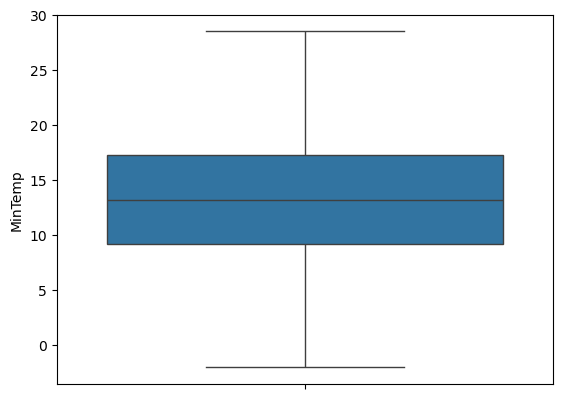

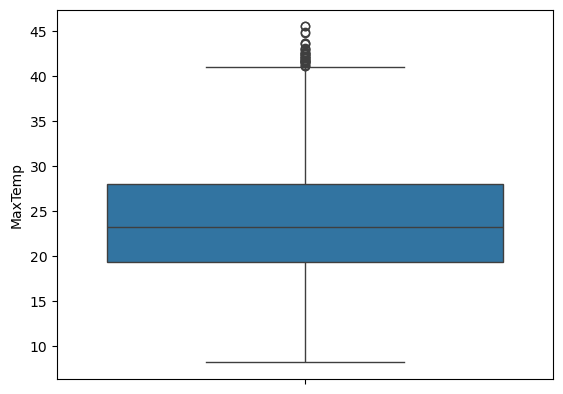

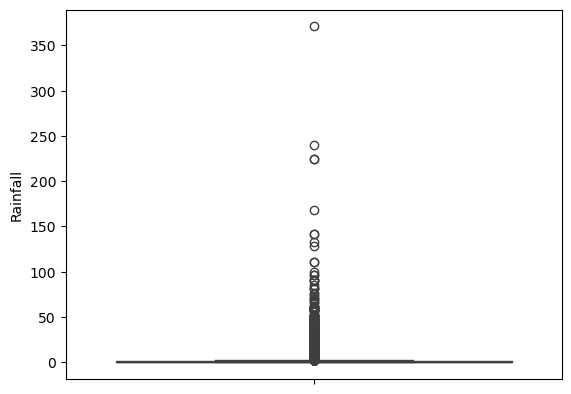

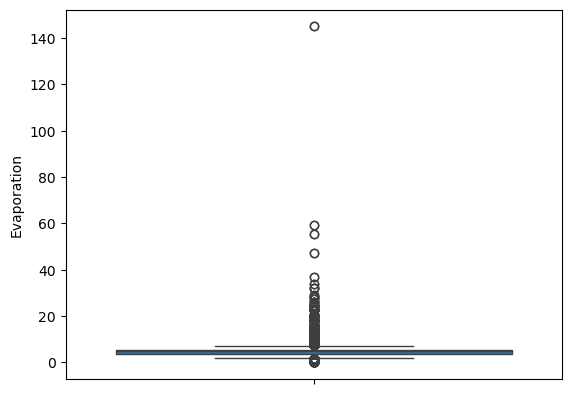

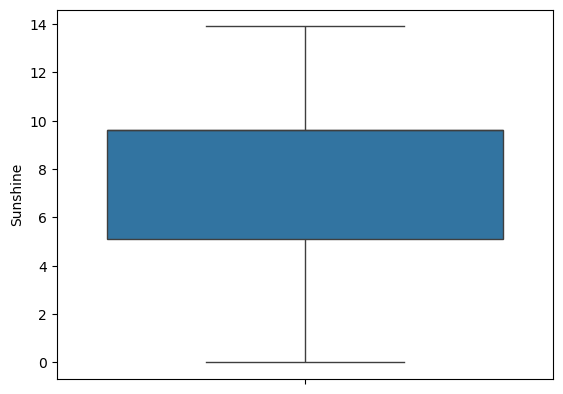

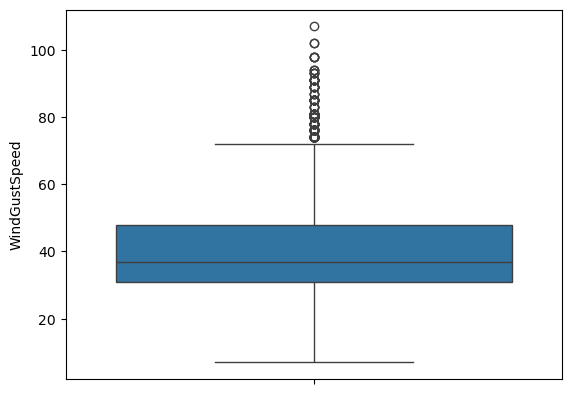

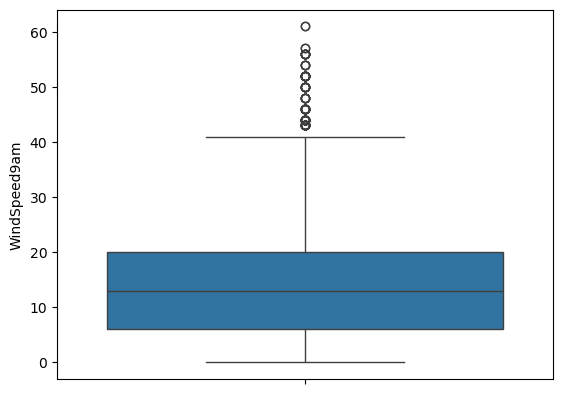

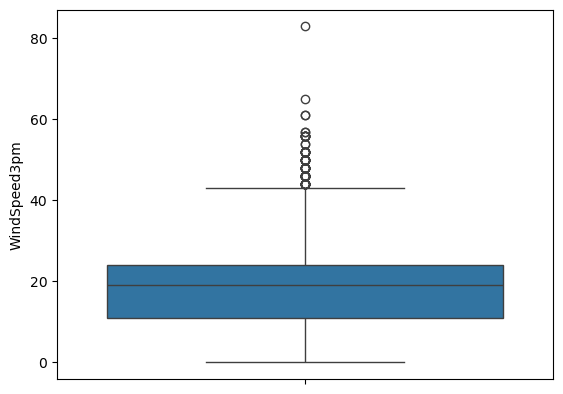

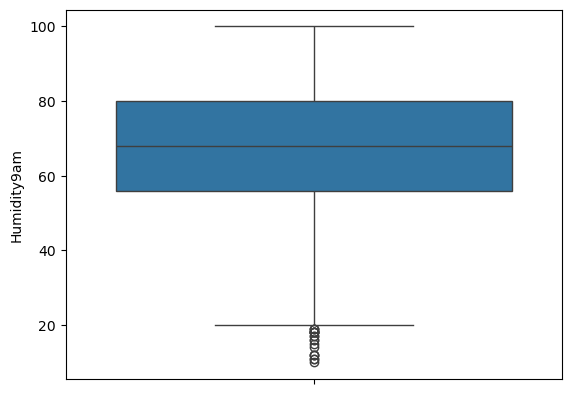

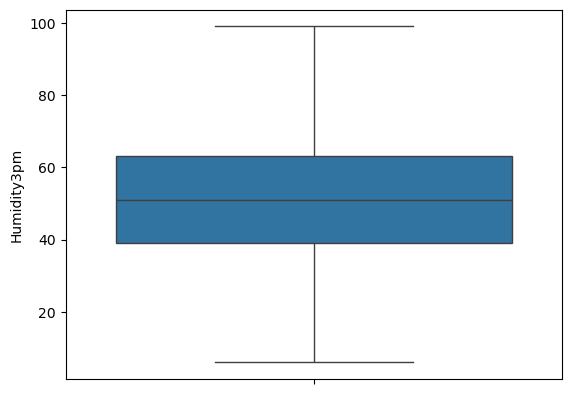

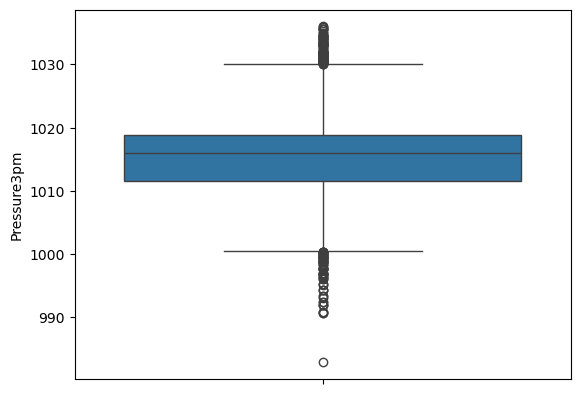

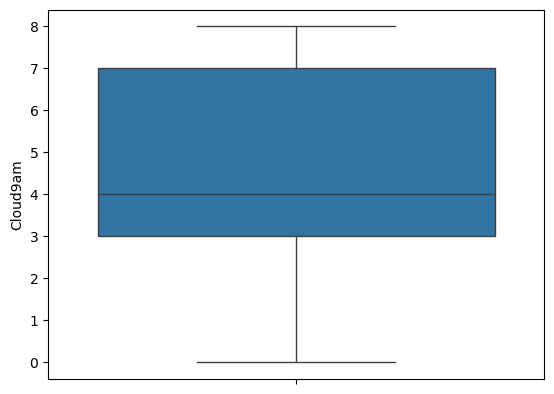

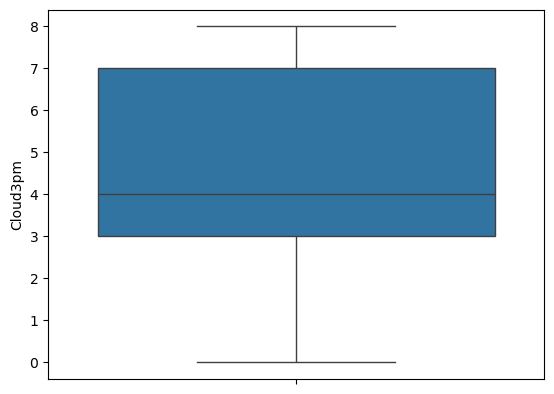

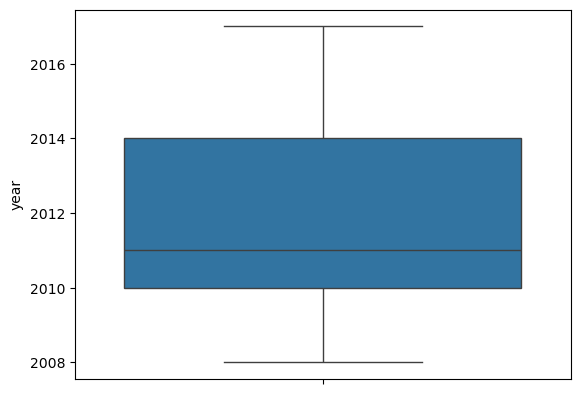

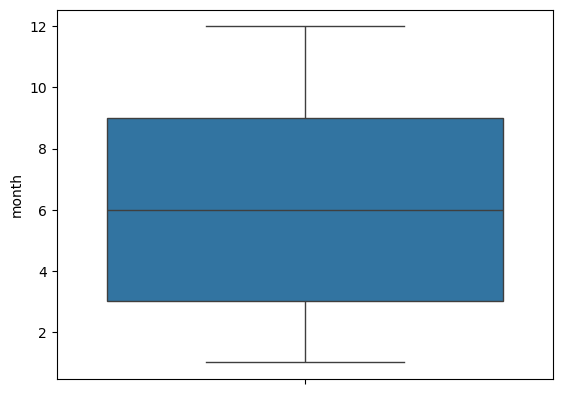

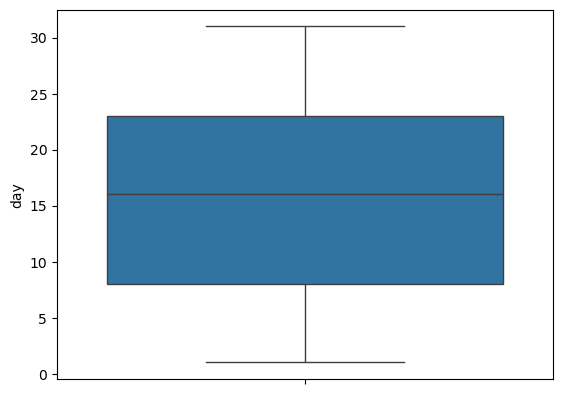

In [112]:
for i in num:
    sns.boxplot(data[i])
    plt.show()

<Axes: xlabel='Rainfall', ylabel='Density'>

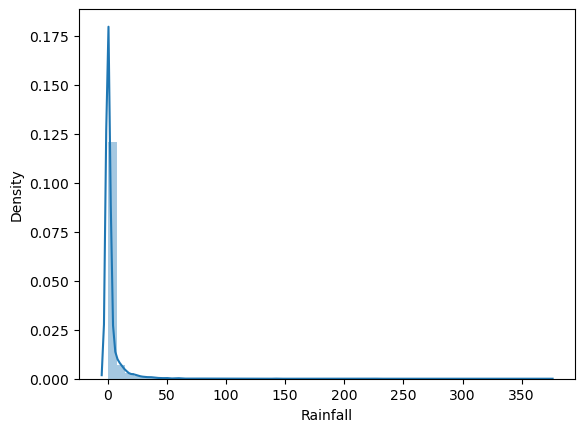

In [113]:
sns.distplot(data['Rainfall'])

In [114]:
data[num].skew()

MinTemp          -0.070098
MaxTemp           0.394841
Rainfall         13.073756
Evaporation      13.998671
Sunshine         -0.822526
WindGustSpeed     0.784800
WindSpeed9am      0.949237
WindSpeed3pm      0.509973
Humidity9am      -0.250378
Humidity3pm       0.118933
Pressure3pm      -0.011625
Cloud9am         -0.261462
Cloud3pm         -0.185359
year              0.421639
month             0.054225
day               0.000577
dtype: float64

In [115]:
for i in num:
    IQR= data[i].quantile(.75)-data[i].quantile(.25)
    lower=data[i].quantile(.25) - (1.5 * IQR)
    upper=data[i].quantile(.75) + (1.5 * IQR)
    data[i]=np.where(data[i]<lower,lower,data[i])
    data[i]=np.where(data[i]>upper,upper,data[i])

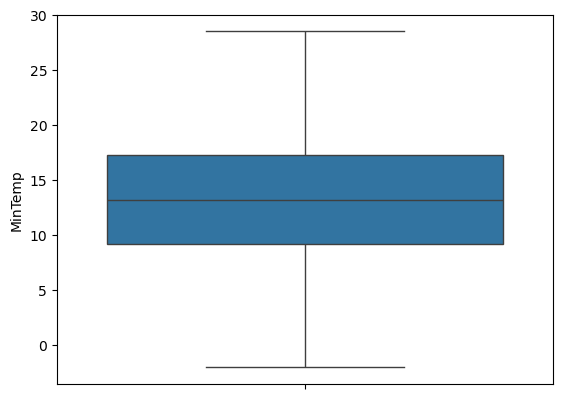

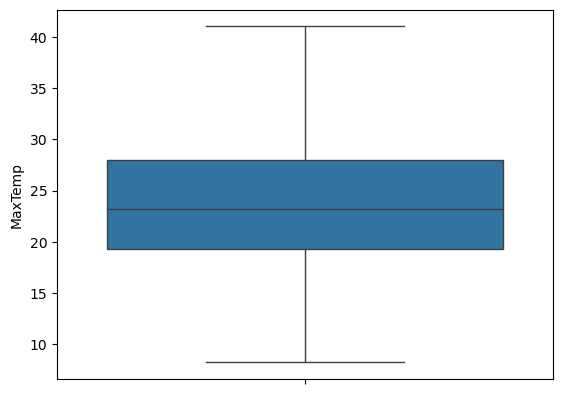

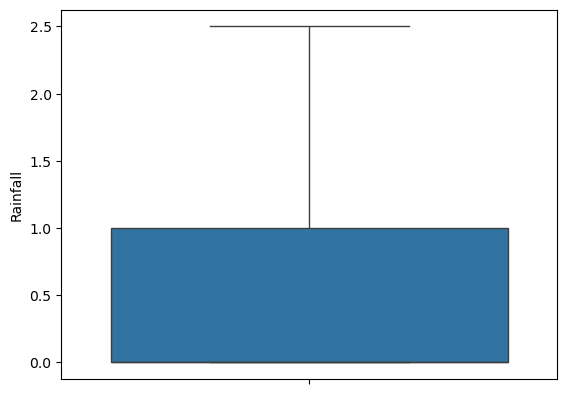

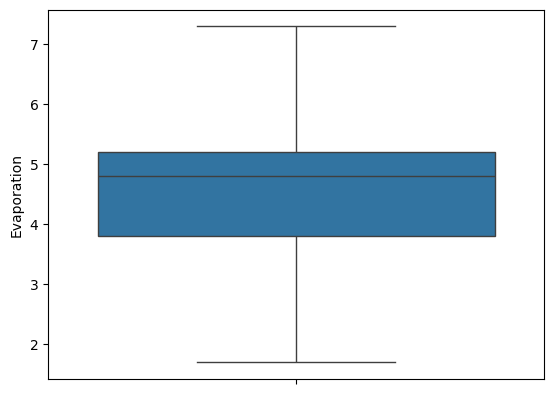

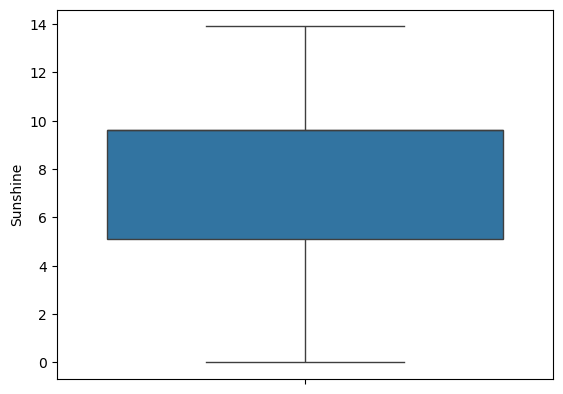

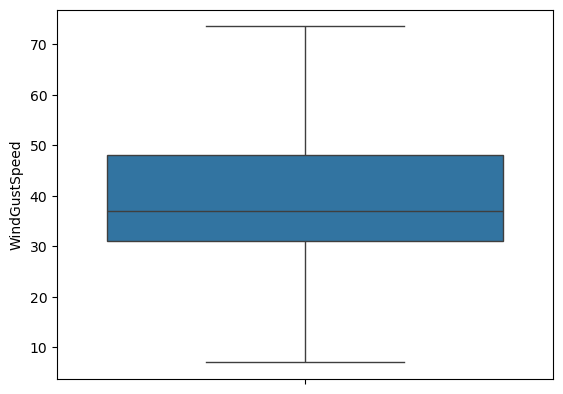

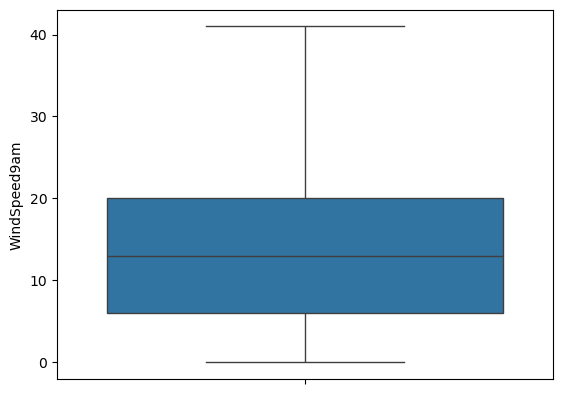

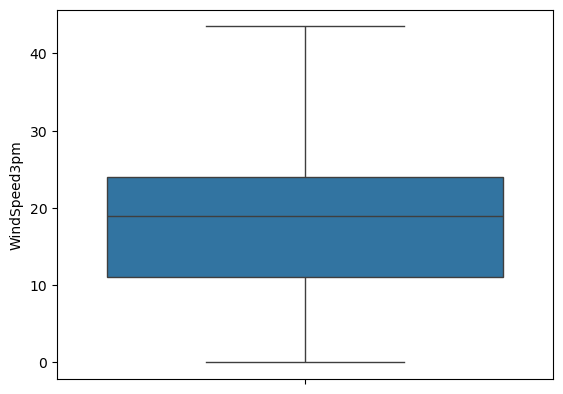

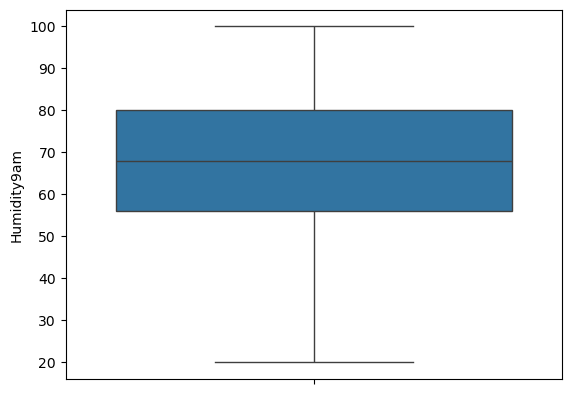

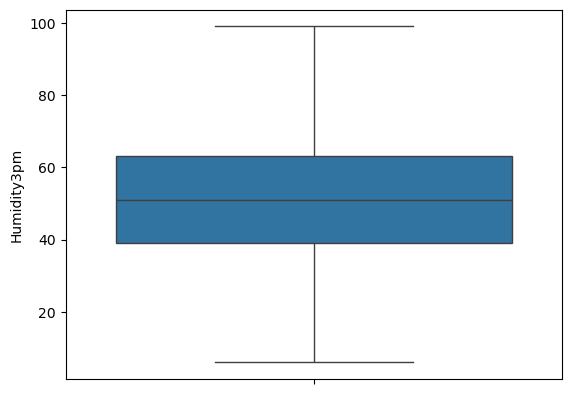

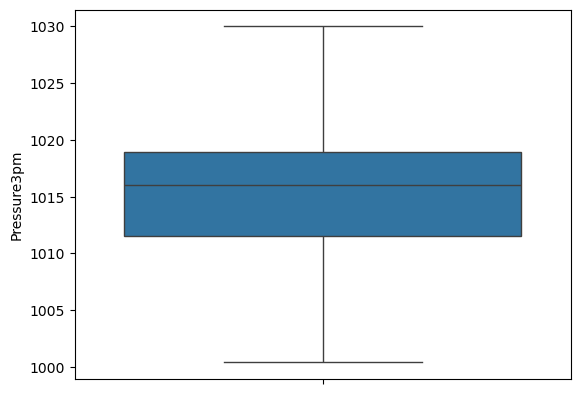

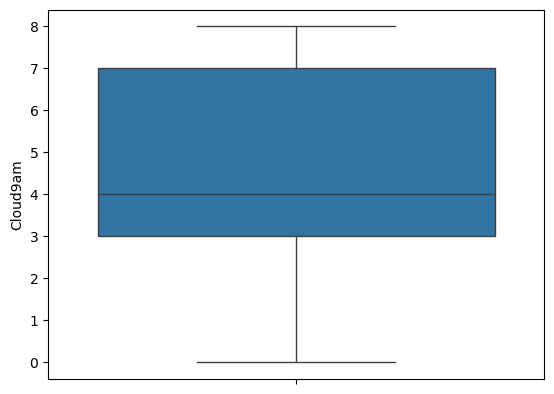

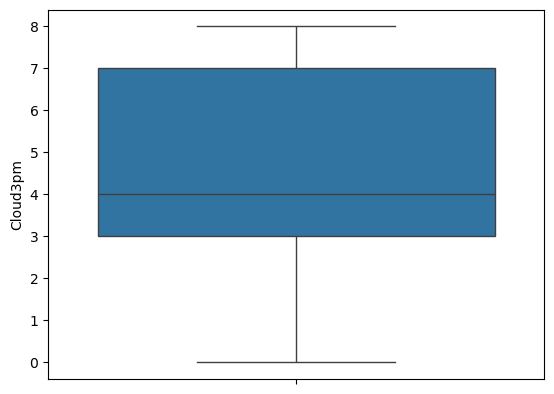

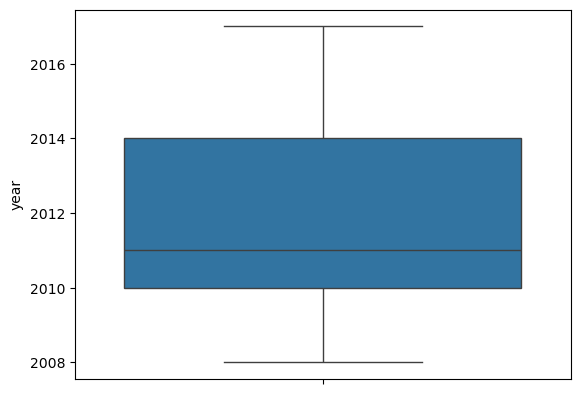

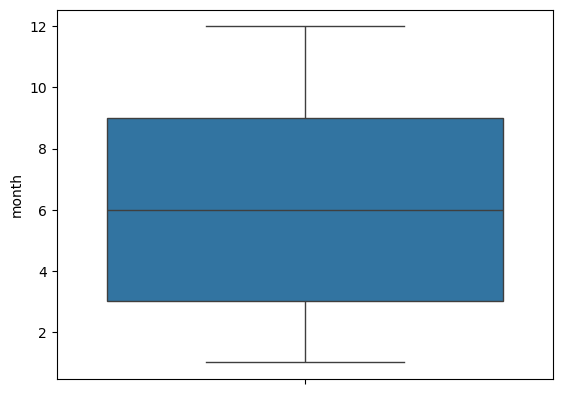

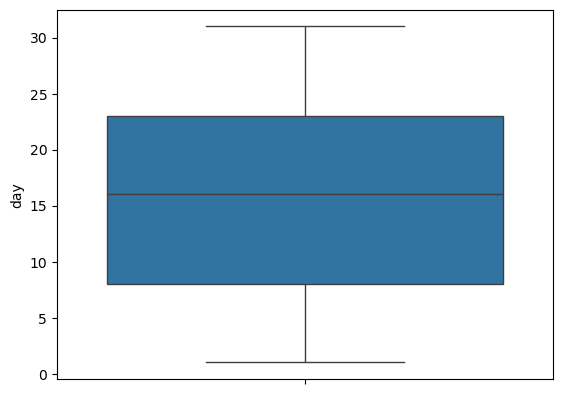

In [116]:
for i in num:
    sns.boxplot(data[i])
    plt.show()

In [117]:
data[num].skew()

MinTemp         -0.070098
MaxTemp          0.372256
Rainfall         1.226519
Evaporation      0.042898
Sunshine        -0.822526
WindGustSpeed    0.556656
WindSpeed9am     0.743355
WindSpeed3pm     0.347722
Humidity9am     -0.235208
Humidity3pm      0.118933
Pressure3pm      0.015165
Cloud9am        -0.261462
Cloud3pm        -0.185359
year             0.421639
month            0.054225
day              0.000577
dtype: float64

In [118]:
# Skewness has been handled

# Transformation

In [120]:
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [121]:
for i in num:
    trans=power_transform(data[num])
    data[i]=sc.fit_transform(trans)

In [122]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
8,Albury,-0.630013,-0.642992,-0.642992,-0.642992,-0.642992,NNW,-0.642992,SE,NW,...,-0.642992,-0.642992,-0.642992,-0.642992,-0.642992,No,Yes,-0.642992,-0.642992,-0.642992
10,Albury,0.054150,0.031187,0.031187,0.031187,0.031187,N,0.031187,SSE,ESE,...,0.031187,0.031187,0.031187,0.031187,0.031187,No,Yes,0.031187,0.031187,0.031187
11,Albury,0.513327,0.498052,0.498052,0.498052,0.498052,NNE,0.498052,NE,ENE,...,0.498052,0.498052,0.498052,0.498052,0.498052,Yes,Yes,0.498052,0.498052,0.498052
12,Albury,0.513327,0.498052,0.498052,0.498052,0.498052,W,0.498052,NNW,NNW,...,0.498052,0.498052,0.498052,0.498052,0.498052,Yes,Yes,0.498052,0.498052,0.498052
16,Albury,0.182945,0.161018,0.161018,0.161018,0.161018,ENE,0.161018,SSW,E,...,0.161018,0.161018,0.161018,0.161018,0.161018,No,Yes,0.161018,0.161018,0.161018


# Encoding

In [124]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
8,Albury,-0.630013,-0.642992,-0.642992,-0.642992,-0.642992,NNW,-0.642992,SE,NW,...,-0.642992,-0.642992,-0.642992,-0.642992,-0.642992,No,Yes,-0.642992,-0.642992,-0.642992
10,Albury,0.054150,0.031187,0.031187,0.031187,0.031187,N,0.031187,SSE,ESE,...,0.031187,0.031187,0.031187,0.031187,0.031187,No,Yes,0.031187,0.031187,0.031187
11,Albury,0.513327,0.498052,0.498052,0.498052,0.498052,NNE,0.498052,NE,ENE,...,0.498052,0.498052,0.498052,0.498052,0.498052,Yes,Yes,0.498052,0.498052,0.498052
12,Albury,0.513327,0.498052,0.498052,0.498052,0.498052,W,0.498052,NNW,NNW,...,0.498052,0.498052,0.498052,0.498052,0.498052,Yes,Yes,0.498052,0.498052,0.498052
16,Albury,0.182945,0.161018,0.161018,0.161018,0.161018,ENE,0.161018,SSW,E,...,0.161018,0.161018,0.161018,0.161018,0.161018,No,Yes,0.161018,0.161018,0.161018


In [125]:
chitest=data[['Location','WindGustDir','WindDir9am','WindDir3pm','RainTomorrow']]
chitest

,Location,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
8,Albury,NNW,SE,NW,Yes
10,Albury,N,SSE,ESE,Yes
11,Albury,NNE,NE,ENE,Yes
12,Albury,W,NNW,NNW,Yes
16,Albury,ENE,SSW,E,Yes
...,...,...,...,...,...
8419,Uluru,E,ESE,E,No
8420,Uluru,E,SE,ENE,No
8421,Uluru,NNW,SE,N,No
8422,Uluru,N,SE,WNW,No


In [126]:

import numpy as np
### let's perform label encoding on WindGustDir
ordinal_label = {k: i for i, k in enumerate(chitest['WindGustDir'].unique(), 0)}
chitest['WindGustDir'] = chitest['WindGustDir'].map(ordinal_label)

In [127]:
ordinal_label = {k: i for i, k in enumerate(chitest['Location'].unique(), 0)}
chitest['Location'] = chitest['Location'].map(ordinal_label)

In [128]:
ordinal_label = {k: i for i, k in enumerate(chitest['WindDir9am'].unique(), 0)}
chitest['WindDir9am'] = chitest['WindDir9am'].map(ordinal_label)

In [129]:
ordinal_label = {k: i for i, k in enumerate(chitest['WindDir3pm'].unique(), 0)}
chitest['WindDir3pm'] = chitest['WindDir3pm'].map(ordinal_label)

In [130]:
chitest['RainTomorrow'].replace('No',0,inplace=True)
chitest['RainTomorrow'].replace('Yes',1,inplace=True)

In [131]:
chitest

,Location,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
8,0,0,0,0,1
10,0,1,1,1,1
11,0,2,2,2,1
12,0,3,3,3,1
16,0,4,4,4,1
...,...,...,...,...,...
8419,11,12,7,4,0
8420,11,12,0,2,0
8421,11,0,0,9,0
8422,11,1,0,5,0


In [132]:
inp=chitest.drop('RainTomorrow',axis=1)
out=chitest['RainTomorrow']

In [133]:
## Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(inp,out)

In [134]:
f_p_values

(array([34.02791176,  2.63753342, 20.16354411,  0.47166443]),
 array([5.43271338e-09, 1.04365465e-01, 7.10950475e-06, 4.92222447e-01]))

In [135]:

p_values=pd.Series(f_p_values[1])
p_values.index=inp.columns
p_values

Location       5.432713e-09
WindGustDir    1.043655e-01
WindDir9am     7.109505e-06
WindDir3pm     4.922224e-01
dtype: float64

<Axes: >

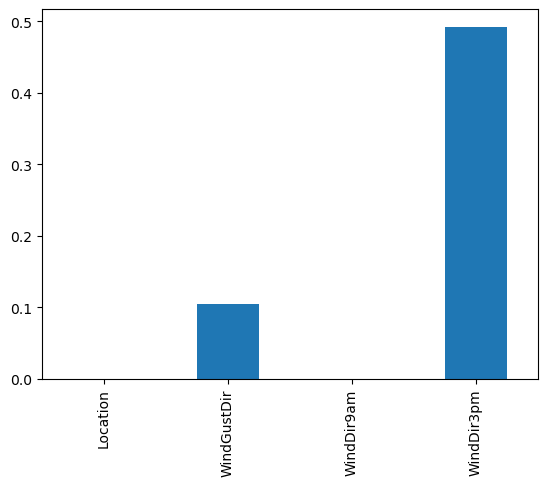

In [136]:
p_values.plot.bar()

In [137]:
16-1 * (2-1 )

15

In [138]:
data.drop('WindDir3pm',axis=1)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
8,Albury,-0.630013,-0.642992,-0.642992,-0.642992,-0.642992,NNW,-0.642992,SE,-0.642992,...,-0.642992,-0.642992,-0.642992,-0.642992,-0.642992,No,Yes,-0.642992,-0.642992,-0.642992
10,Albury,0.054150,0.031187,0.031187,0.031187,0.031187,N,0.031187,SSE,0.031187,...,0.031187,0.031187,0.031187,0.031187,0.031187,No,Yes,0.031187,0.031187,0.031187
11,Albury,0.513327,0.498052,0.498052,0.498052,0.498052,NNE,0.498052,NE,0.498052,...,0.498052,0.498052,0.498052,0.498052,0.498052,Yes,Yes,0.498052,0.498052,0.498052
12,Albury,0.513327,0.498052,0.498052,0.498052,0.498052,W,0.498052,NNW,0.498052,...,0.498052,0.498052,0.498052,0.498052,0.498052,Yes,Yes,0.498052,0.498052,0.498052
16,Albury,0.182945,0.161018,0.161018,0.161018,0.161018,ENE,0.161018,SSW,0.161018,...,0.161018,0.161018,0.161018,0.161018,0.161018,No,Yes,0.161018,0.161018,0.161018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,Uluru,-1.794801,-1.751381,-1.751381,-1.751381,-1.751381,E,-1.751381,ESE,-1.751381,...,-1.751381,-1.751381,-1.751381,-1.751381,-1.751381,No,No,-1.751381,-1.751381,-1.751381
8420,Uluru,-1.928608,-1.876512,-1.876512,-1.876512,-1.876512,E,-1.876512,SE,-1.876512,...,-1.876512,-1.876512,-1.876512,-1.876512,-1.876512,No,No,-1.876512,-1.876512,-1.876512
8421,Uluru,-1.775739,-1.733525,-1.733525,-1.733525,-1.733525,NNW,-1.733525,SE,-1.733525,...,-1.733525,-1.733525,-1.733525,-1.733525,-1.733525,No,No,-1.733525,-1.733525,-1.733525
8422,Uluru,-1.434531,-1.412489,-1.412489,-1.412489,-1.412489,N,-1.412489,SE,-1.412489,...,-1.412489,-1.412489,-1.412489,-1.412489,-1.412489,No,No,-1.412489,-1.412489,-1.412489


# Encoding

In [140]:
data['RainTomorrow'].replace('No',0,inplace=True)
data['RainTomorrow'].replace('Yes',1,inplace=True)

data['RainToday'].replace('No',0,inplace=True)
data['RainToday'].replace('Yes',1,inplace=True)

In [141]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
8,Albury,-0.630013,-0.642992,-0.642992,-0.642992,-0.642992,NNW,-0.642992,SE,NW,...,-0.642992,-0.642992,-0.642992,-0.642992,-0.642992,0,1,-0.642992,-0.642992,-0.642992
10,Albury,0.054150,0.031187,0.031187,0.031187,0.031187,N,0.031187,SSE,ESE,...,0.031187,0.031187,0.031187,0.031187,0.031187,0,1,0.031187,0.031187,0.031187
11,Albury,0.513327,0.498052,0.498052,0.498052,0.498052,NNE,0.498052,NE,ENE,...,0.498052,0.498052,0.498052,0.498052,0.498052,1,1,0.498052,0.498052,0.498052
12,Albury,0.513327,0.498052,0.498052,0.498052,0.498052,W,0.498052,NNW,NNW,...,0.498052,0.498052,0.498052,0.498052,0.498052,1,1,0.498052,0.498052,0.498052
16,Albury,0.182945,0.161018,0.161018,0.161018,0.161018,ENE,0.161018,SSW,E,...,0.161018,0.161018,0.161018,0.161018,0.161018,0,1,0.161018,0.161018,0.161018


In [142]:
X=data.drop('RainTomorrow',axis=1)
y=data['RainTomorrow']

In [143]:
X.shape  , y.shape

((8079, 21), (8079,))

In [144]:
X=pd.get_dummies(X,drop_first=True)

In [145]:
X.shape , y.shape

((8079, 73), (8079,))

# SMOTE- Balancing dataset

In [147]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,y=sm.fit_resample(X,y)

In [148]:
X.shape , y.shape

((12310, 73), (12310,))

# Machinbe Leaning

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [151]:
# FInd best Random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=i,test_size=.30)
    LR= LogisticRegression()
    LR.fit(X_train,y_train)
    pred= LR.predict(X_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",(maxaccu)*100,"on Random State =",maxRS)

Best accuracy is  80.1245599783374 on Random State = 92


In [152]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=190,test_size=.3)

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB

In [154]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
XGB_model= XGBClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()
ET_model = ExtraTreeClassifier()
ETs_model = ExtraTreesClassifier()
BNB_model = BernoulliNB()
GNB_model = GaussianNB()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model,ET_model,ETs_model,GNB_model,BNB_model ]

In [155]:
accuracy=[]
f1=[]

for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    pred= m.predict(X_test)
    accuracy.append(round(accuracy_score(y_test,pred) * 100, 2))
    f1.append(round(f1_score(y_test,pred) * 100, 2))
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print("F1 SCore                ", f1_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*50)
    
pd.DataFrame({'Model':model,'Accuracy':accuracy,'F1 Score':f1})

Accuracy_Score of  LogisticRegression() is 79.88085567289467
F1 SCore                 78.56936832996827
Confusion Matrix of  LogisticRegression()  is 
 [[1588  262]
 [ 481 1362]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1850
           1       0.84      0.74      0.79      1843

    accuracy                           0.80      3693
   macro avg       0.80      0.80      0.80      3693
weighted avg       0.80      0.80      0.80      3693

**************************************************
Accuracy_Score of  RidgeClassifier() is 79.71838613593285
F1 SCore                 78.25834542815674
Confusion Matrix of  RidgeClassifier()  is 
 [[1596  254]
 [ 495 1348]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1850
           1       0.84      0.73      0.78      1843

    accuracy                           0.80      3693
   macro avg       0.80      0.80      0.80      369

,Model,Accuracy,F1 Score
0,LogisticRegression(),79.88,78.57
1,RidgeClassifier(),79.72,78.26
2,DecisionTreeClassifier(),84.92,84.96
3,SVC(),81.05,80.20
4,KNeighborsClassifier(),86.35,86.77
5,"(DecisionTreeClassifier(max_features='sqrt', r...",87.33,87.16
6,"XGBClassifier(base_score=None, booster=None, c...",86.35,86.21
7,SGDClassifier(),79.56,77.99
8,(DecisionTreeClassifier(random_state=713142584...,86.81,86.62
9,"(DecisionTreeClassifier(max_depth=1, random_st...",73.19,72.08


# ExtratreesClassifier() Hypertuning

In [157]:
ETs_model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [158]:
from scipy.stats import randint

In [159]:
parameter = {"max_depth": randint(1,10),
    "max_features": ["sqrt", "log2", None],
    'random_state':randint(50,300),
    "min_samples_leaf": randint(1, 9),
    'n_estimators':randint(10,100),
    'n_jobs':[-2,-1,1],
    "criterion": ["gini", "entropy"],
    'class_weight' :["balanced", "balanced_subsample"],
    'min_samples_split': randint(1,10)}

In [160]:
from sklearn.model_selection import RandomizedSearchCV

In [162]:
GCV=RandomizedSearchCV(ETs_model,parameter,cv=5)
GCV.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(),
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DFE6C1EDB0>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DFE6957EC0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DFEC4CCAA0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DFEC4CC8C0>,
                                        'n_jobs': [-2, -1, 1],
                                        'random_state': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DFE6C1C650>})

In [163]:
GCV.best_estimator_

ExtraTreesClassifier(class_weight='balanced', criterion='entropy', max_depth=9,
                     min_samples_leaf=4, min_samples_split=4, n_estimators=36,
                     n_jobs=-1, random_state=109)

In [164]:
GCV.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 36,
 'n_jobs': -1,
 'random_state': 109}

In [165]:
GCV_pred=GCV.best_estimator_.predict(X_test)
accuracy_score(y_test,GCV_pred)

0.7470890874627674

# Confusion Matrix

<Axes: >

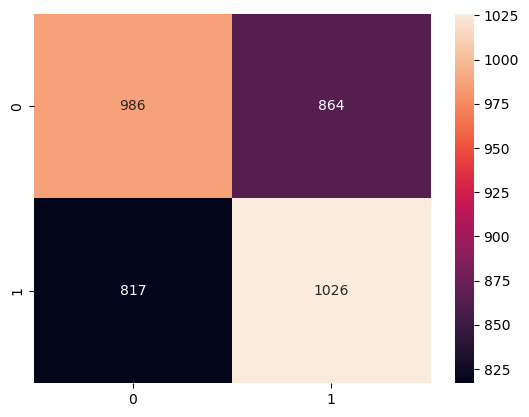

In [171]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)
sns.heatmap(confusion_matrix(y_test,pred),annot=True, fmt='d')

# AUC ROC plot

In [174]:
from sklearn.metrics import roc_auc_score,roc_curve,RocCurveDisplay,auc

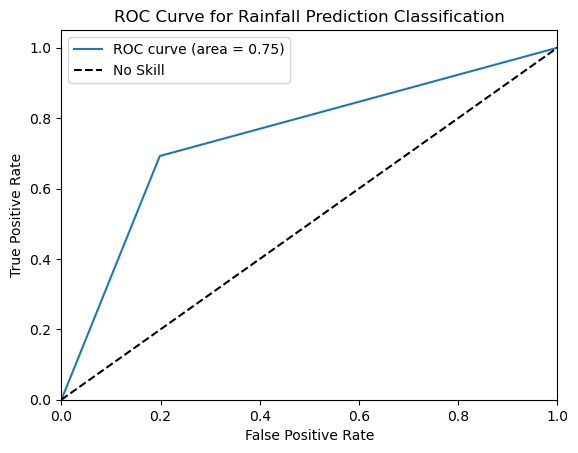

In [176]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test,GCV_pred) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Rainfall Prediction Classification')
plt.legend()
plt.show()

* AUC = 75%

# Saving Model

In [180]:
import joblib
joblib.dump(ETs_model,"Rainfall_Prediction.pkl")

['Rainfall_Prediction.pkl']

In [182]:

a = np.array(y_test)
df = pd.DataFrame()
df['Prediction'] = GCV_pred
df['original'] = a
df

,Prediction,original
0,1,1
1,1,1
2,0,0
3,1,1
4,0,1
...,...,...
3688,1,1
3689,1,1
3690,1,1
3691,0,0


# Final Model (Gaurav_Birari)